import lib's

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Data

In [3]:
df = pd.read_csv('data_analysis_first_assignment.csv')

Clean study hours column

In [4]:
df['How many hours per day do you spend studying during exam season? (numbers only)'] = pd.to_numeric(
    df['How many hours per day do you spend studying during exam season? (numbers only)'],
    errors='coerce'
)

Remove joke responses

In [5]:
df = df[~df["If yes, what techniques do you use? (Multiple choice: Meditation, exercise, talking to friends, etc.)"].str.contains("gay", na=False)]

statistics

In [6]:
stress_mean = df["On a scale of 1 to 5, how stressed do you feel during exam season? (1 = Not stressed, 5 = Extremely stressed)"].mean()
study_hours_median = df["How many hours per day do you spend studying during exam season? (numbers only)"].median()

print(f"Average stress level: {stress_mean:.2f}")
print(f"Median study hours: {study_hours_median}")

Average stress level: 3.22
Median study hours: 5.0


 Gender distribution

In [7]:
gender_counts = df['Gender'].value_counts()
print("\nGender Distribution:\n", gender_counts)


Gender Distribution:
 Gender
Male      16
Female    16
Name: count, dtype: int64


Stress sources analysis

In [8]:
stress_sources = df["What are the primary sources of your stress during exams?"].str.split(', ', expand=True).stack().value_counts()
print("\nTop Stress Sources:\n", stress_sources)


Top Stress Sources:
 family expectations    22
time management        20
Academic workload      10
Name: count, dtype: int64


Stress management techniques

In [9]:
techniques = df["If yes, what techniques do you use? (Multiple choice: Meditation, exercise, talking to friends, etc.)"].str.split(', ', expand=True).stack().value_counts()
print("\nTop Techniques:\n", techniques)


Top Techniques:
 exercise              10
talking to friends     9
Meditation             3
Name: count, dtype: int64


Save Cleaned Data

In [10]:
df.to_csv('cleaned_survey_data.csv', index=False)

Visualizations

Stress Level Distribution

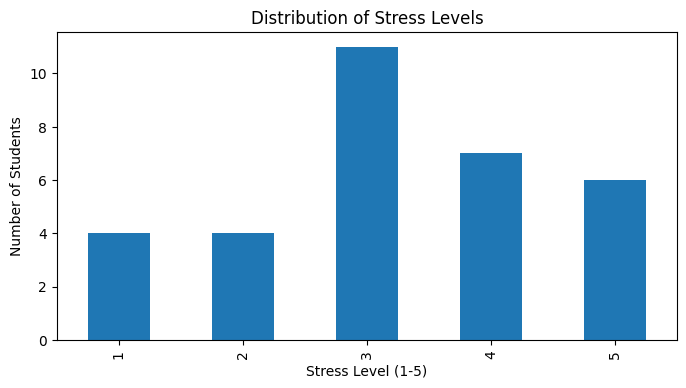

In [ ]:
plt.figure(figsize=(8, 4))
df["On a scale of 1 to 5, how stressed do you feel during exam season? (1 = Not stressed, 5 = Extremely stressed)"].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Stress Levels")
plt.xlabel("Stress Level (1-5)")
plt.ylabel("Number of Students")
plt.show()

Study Hours vs. Stress Level:

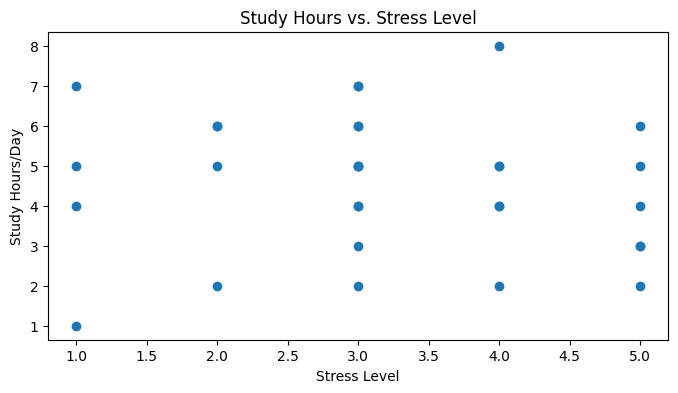

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(
    df["On a scale of 1 to 5, how stressed do you feel during exam season? (1 = Not stressed, 5 = Extremely stressed)"],
    df["How many hours per day do you spend studying during exam season? (numbers only)"]
)
plt.title("Study Hours vs. Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Study Hours/Day")
plt.show()

Pie Chart for Stress

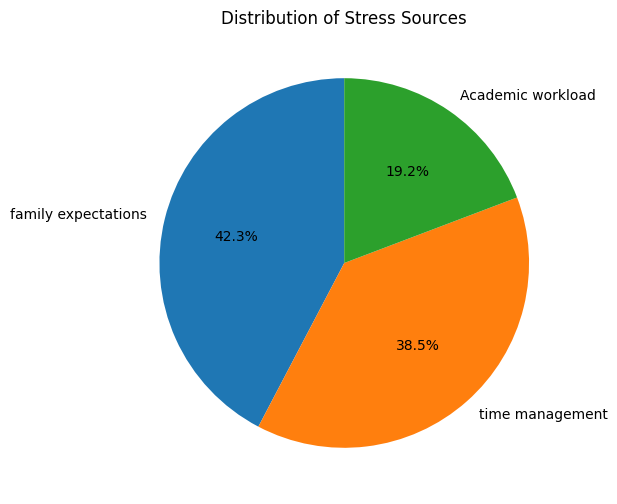

In [ ]:
plt.figure(figsize=(8, 6))
stress_sources.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Stress Sources")
plt.ylabel("")
plt.show()

Bar Chart for Stress Techniques

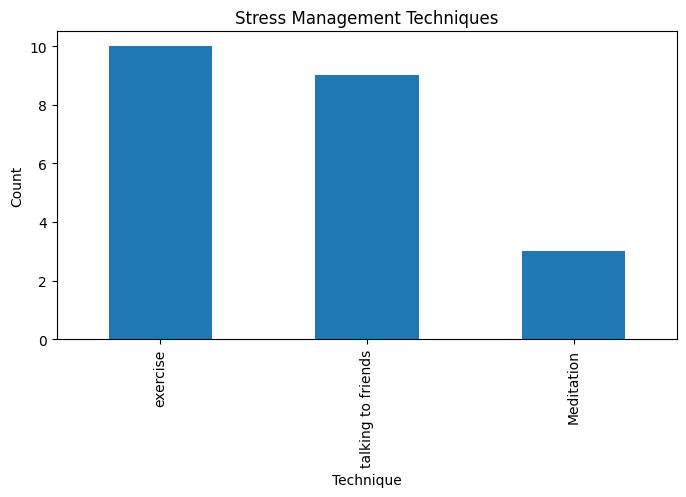

In [ ]:
plt.figure(figsize=(8, 4))
techniques.plot(kind='bar')
plt.title("Stress Management Techniques")
plt.xlabel("Technique")
plt.ylabel("Count")
plt.show()